# Broadcasting

The term broadcasting describes how numpy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is "broadcast" across the larger array so that they have compatible shapes. Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python. It does this without making needless copies of data and usually leads to efficient algorithm implementations. There are also cases where broadcasting is a bad idea because it leads to inefficient use of memory that slows computation.

Numpy operations are usually done element-by-element which requires two arrays to have exactly the same shape. Numpy's broadcasting rule relaxes this constraint when the arrays' shapes meet certain constraints. The simplest broadcasting example occurs when an array and a scalar value are combined in an operation.

Consider the example given below:

In [1]:
import numpy as np

In [2]:
a = np.array([1.0, 2.0, 3.0])

In [3]:
b = np.array([2.0, 2.0, 2.0])

In [4]:

a*b

array([2., 4., 6.])

In [5]:
b = np.array([2.0])

In [6]:
b.shape

(1,)

In [7]:
a*b

array([2., 4., 6.])

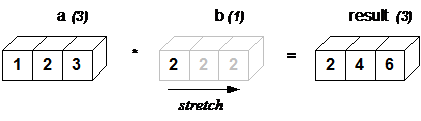

In above example, the scalar b is stretched to become an array of with the same shape as a so the shapes are compatible for element-by-element multiplication.

Why broadcasting is better?

We can think of the scalar b being stretched during the arithmetic operation into an array with the same shape as a. The new elements in b, as shown in above figure, are simply copies of the original scalar. Although, the stretching analogy is only conceptual. Numpy is smart enough to use the original scalar value without actually making copies so that broadcasting operations are as memory and computationally efficient as possible. Because Example 1 moves less memory, (b is a scalar, not an array) around during the multiplication, it is about 10% faster than Example 2 using the standard numpy on Windows 2000 with one million element arrays!

# The Broadcasting Rule

In order to broadcast, the size of the trailing axes for both arrays in an operation must either be the same size or one of them must be one.

Let us see some examples:

A(2-D array): 4 x 3
B(1-D array):     3
Result      : 4 x 3
A(4-D array): 7 x 1 x 6 x 1
B(3-D array):     3 x 1 x 5
Result      : 7 x 3 x 6 x 5
But this would be a mismatch:

A: 4 x 3
B:     4
Now, let us see an example where both arrays get stretched.

In [9]:
a = np.array([0.0, 10.0, 20.0, 30.0])
b = np.array([0.0, 1.0, 2.0])

In [10]:
a = a.reshape((4,1))

In [11]:
a.shape

(4, 1)

In [12]:

b.shape

(3,)

In [13]:

a + b

array([[ 0.,  1.,  2.],
       [10., 11., 12.],
       [20., 21., 22.],
       [30., 31., 32.]])

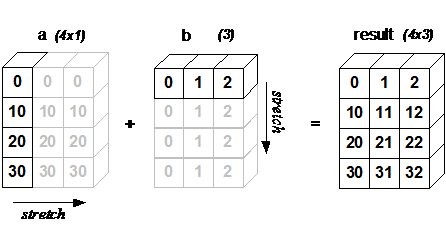